In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("preprocessed_redditData-removedtopic.csv")

In [4]:
analyzer = SentimentIntensityAnalyzer()

df['text'] = df['text'].astype(str)

df['vader_score'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(label_sentiment)

In [5]:
sentiment_counts = df.groupby(['subreddit', 'year', 'vader_sentiment']) \
                     .size().reset_index(name='count')

In [6]:
sentiment_by_year = df.groupby('year')['vader_score'].mean().reset_index()


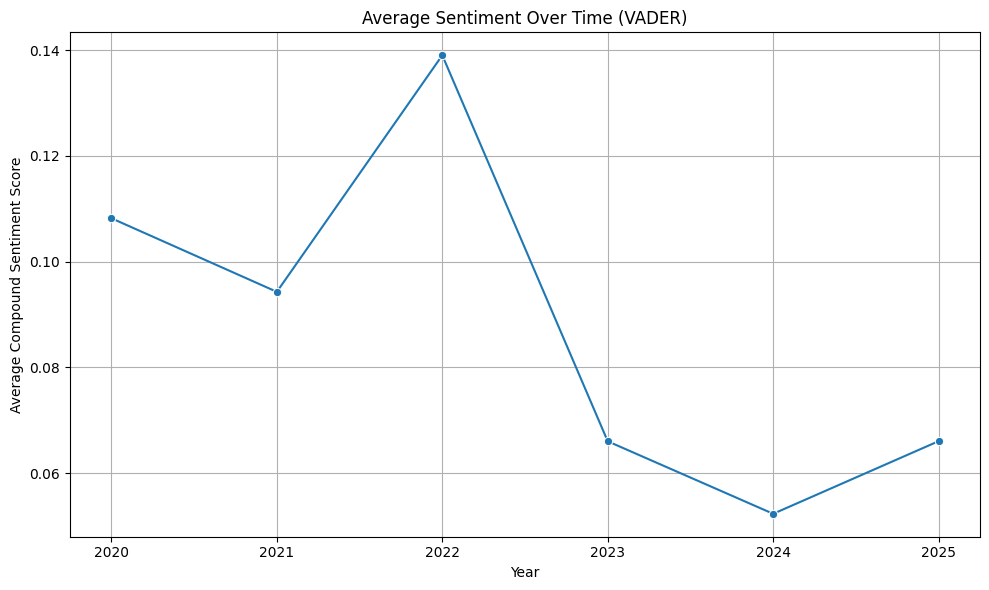

In [7]:


plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_by_year, x='year', y='vader_score', marker='o')
plt.title("Average Sentiment Over Time (VADER)")
plt.xlabel("Year")
plt.ylabel("Average Compound Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Group by subreddit (game) and year, then calculate average score and distribution
sentiment_summary = df.groupby(['subreddit', 'year']).agg(
    avg_vader_score=('vader_score', 'mean'),
    num_posts=('vader_score', 'count'),
    num_positive=('vader_sentiment', lambda x: (x == 'positive').sum()),
    num_negative=('vader_sentiment', lambda x: (x == 'negative').sum()),
    num_neutral=('vader_sentiment', lambda x: (x == 'neutral').sum())
).reset_index()

In [9]:
print(sentiment_summary)

     subreddit  year  avg_vader_score  num_posts  num_positive  num_negative  \
0   callofduty  2020         0.052367        984           359           248   
1   callofduty  2021         0.029202        975           310           253   
2   callofduty  2022         0.058372        907           350           252   
3   callofduty  2023         0.024688        988           297           254   
4   callofduty  2024        -0.009011        981           262           272   
..         ...   ...              ...        ...           ...           ...   
61    valorant  2021         0.088343        956           394           269   
62    valorant  2022         0.136156        951           416           227   
63    valorant  2023         0.025472        982           313           262   
64    valorant  2024         0.035436        987           328           249   
65    valorant  2025         0.099512        984           367           170   

    num_neutral  
0           377  
1  

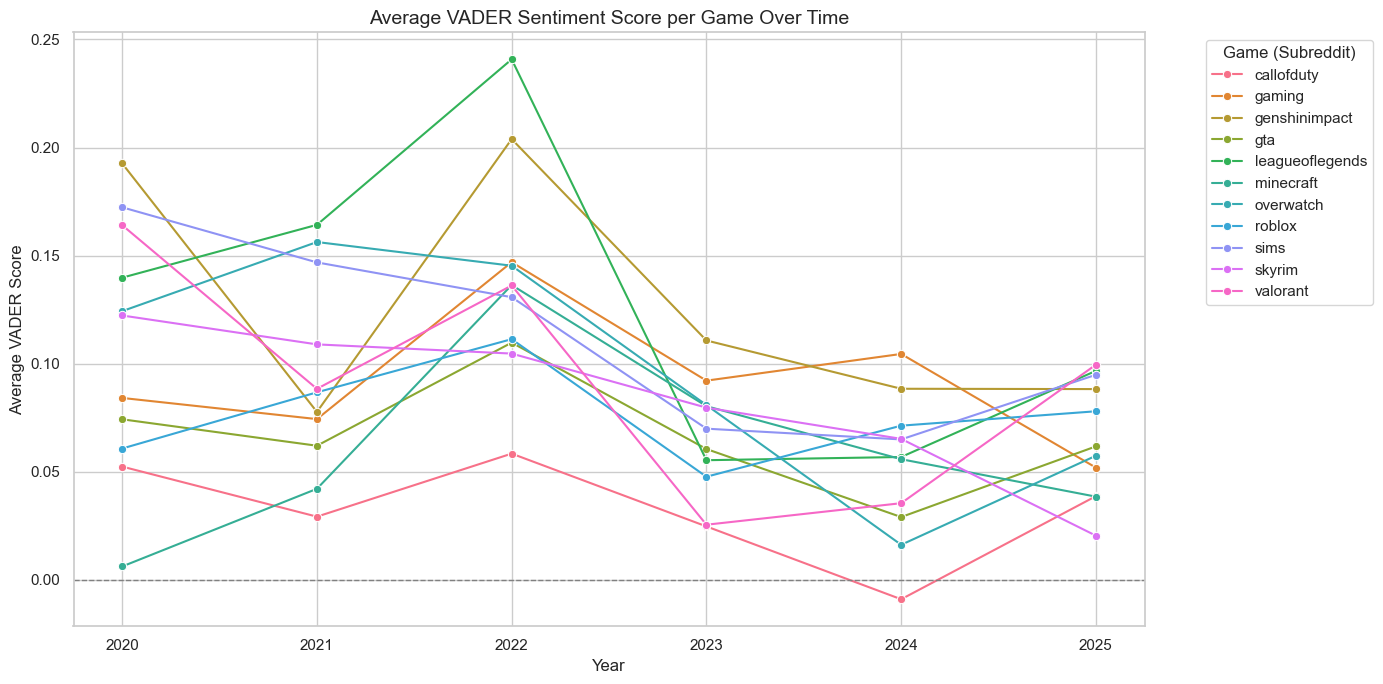

In [10]:
# Set up the plot style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create the lineplot
sns.lineplot(
    data=sentiment_summary,
    x='year',
    y='avg_vader_score',
    hue='subreddit',
    marker='o'
)

# Chart title and labels
plt.title("Average VADER Sentiment Score per Game Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average VADER Score")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Game (Subreddit)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

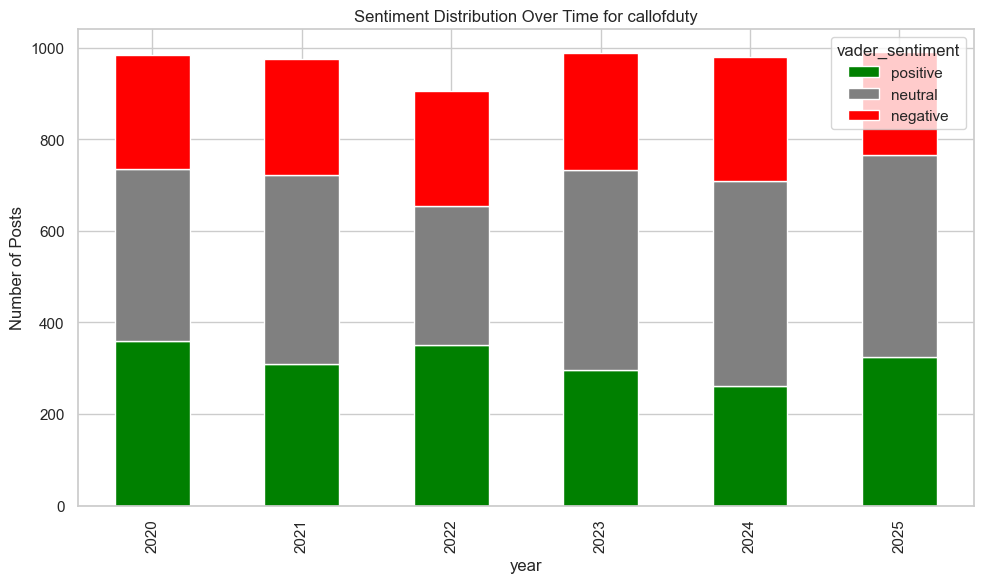

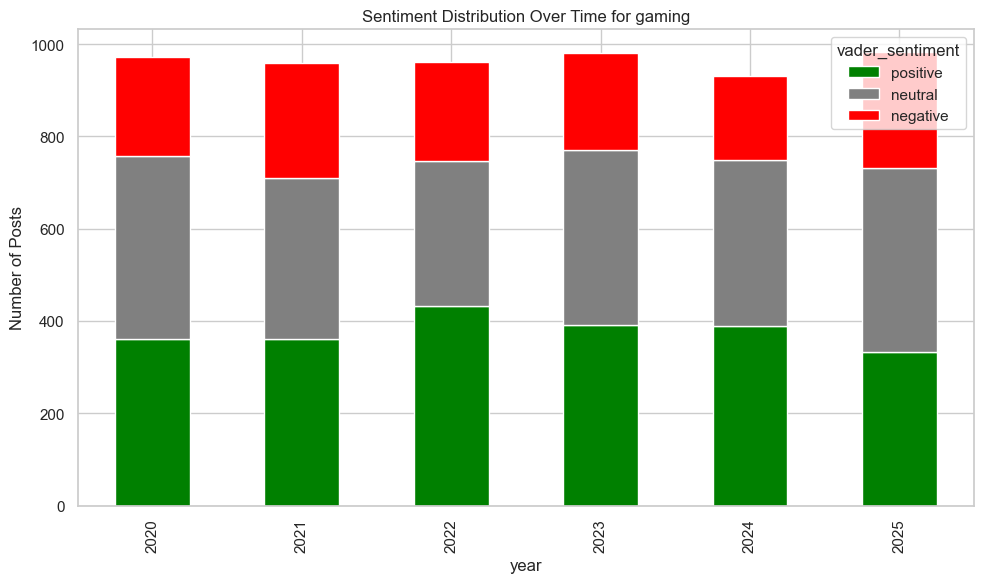

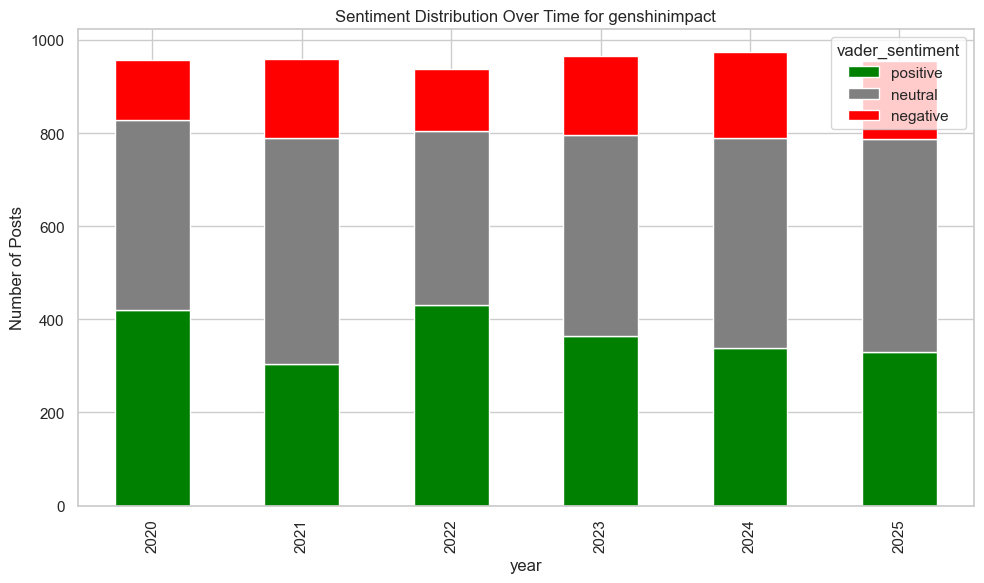

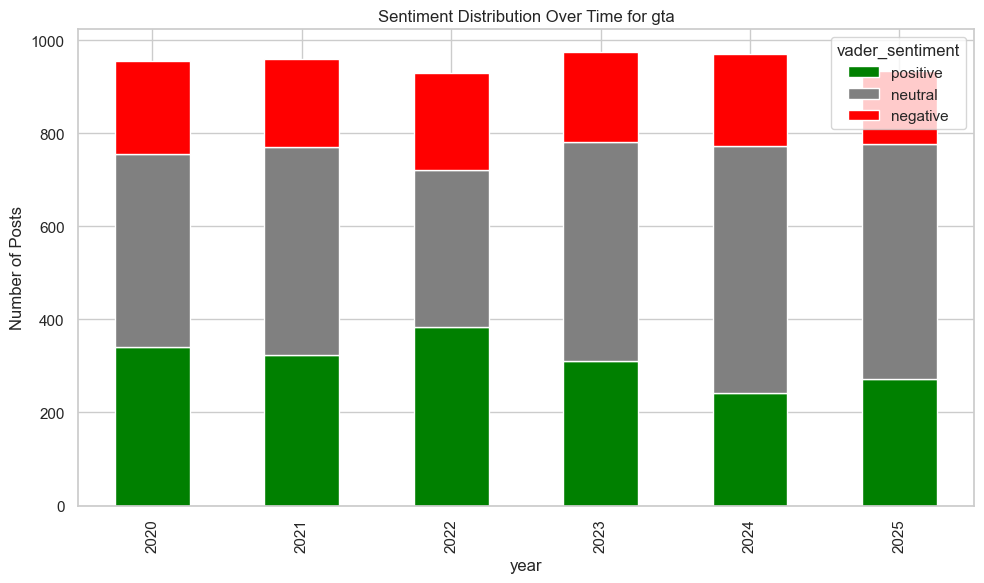

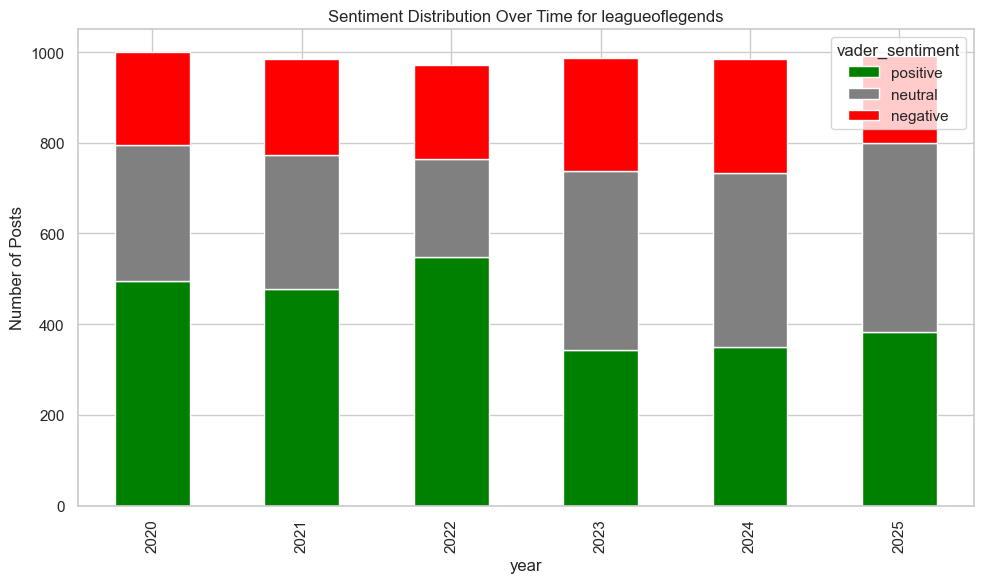

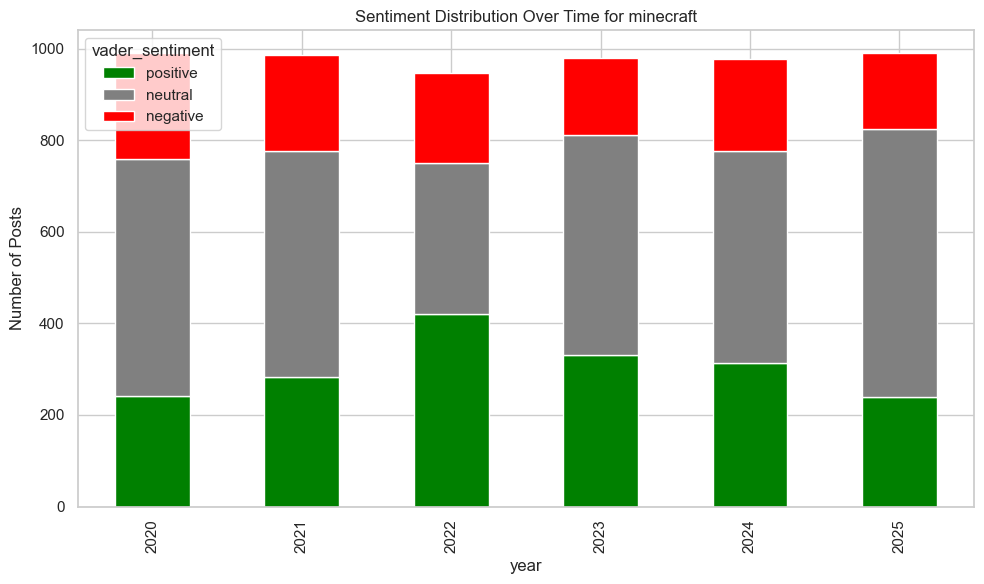

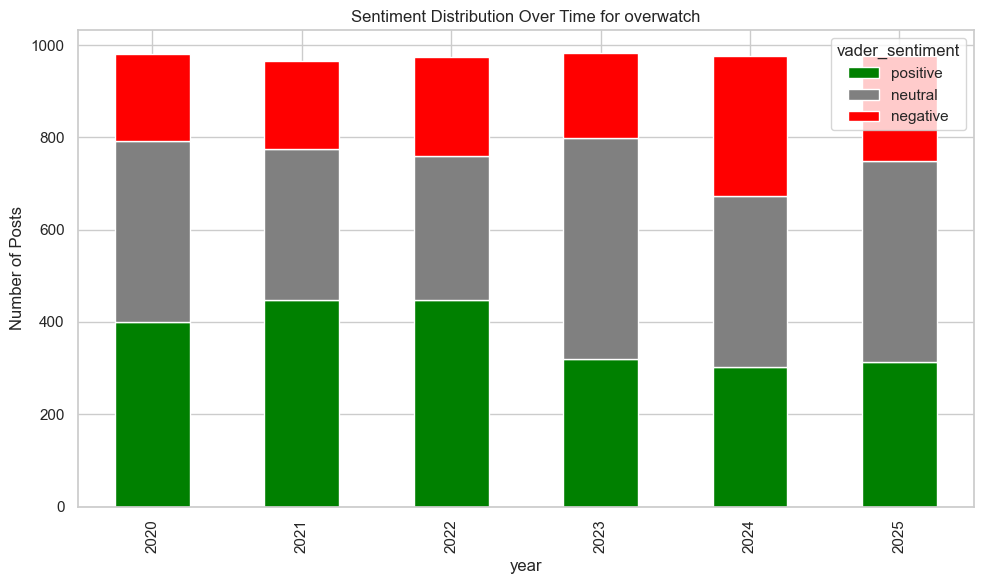

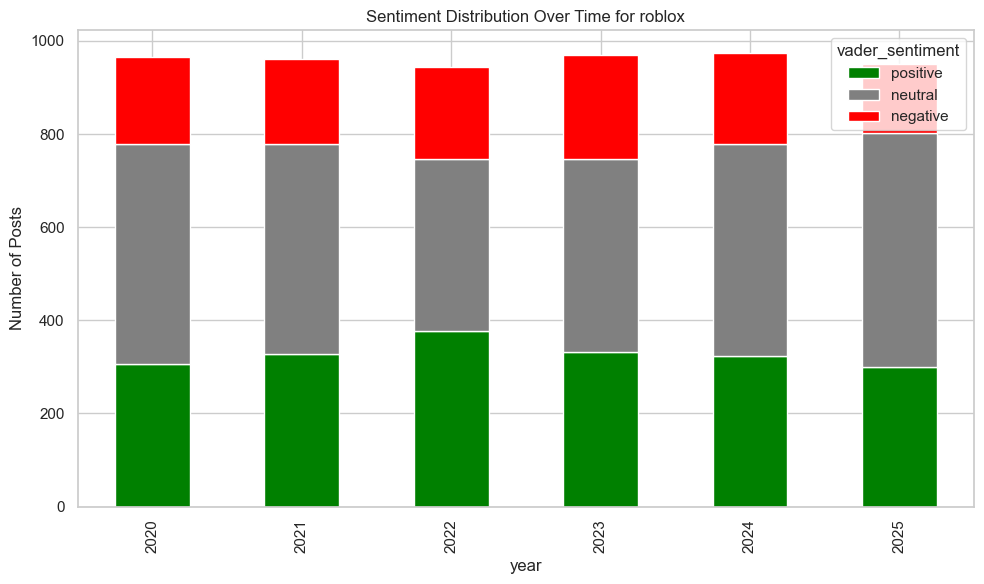

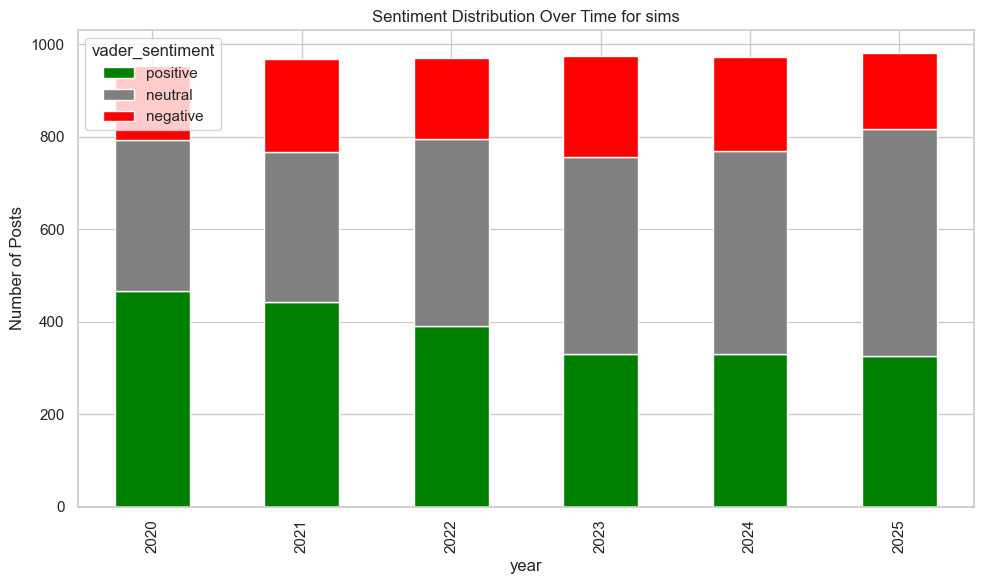

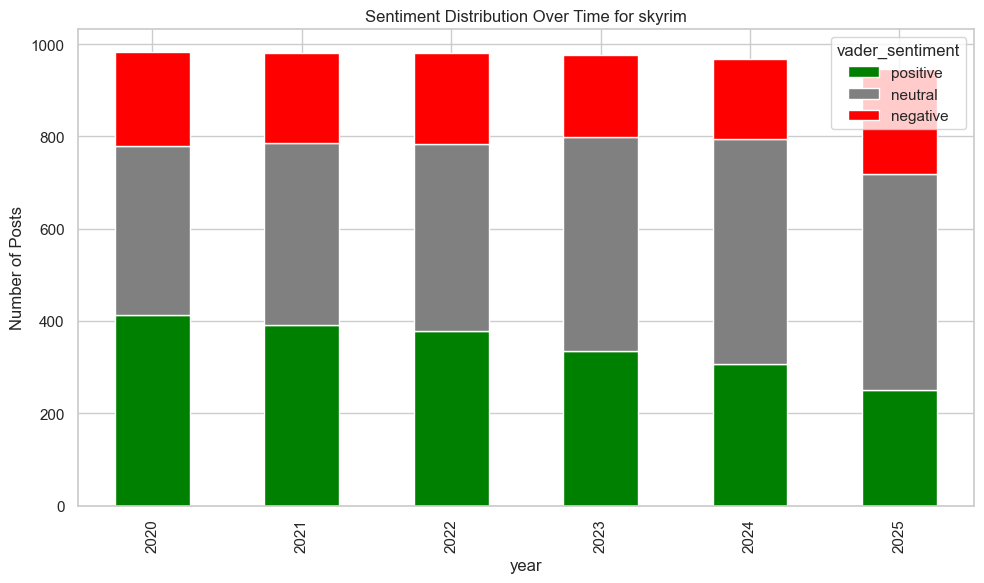

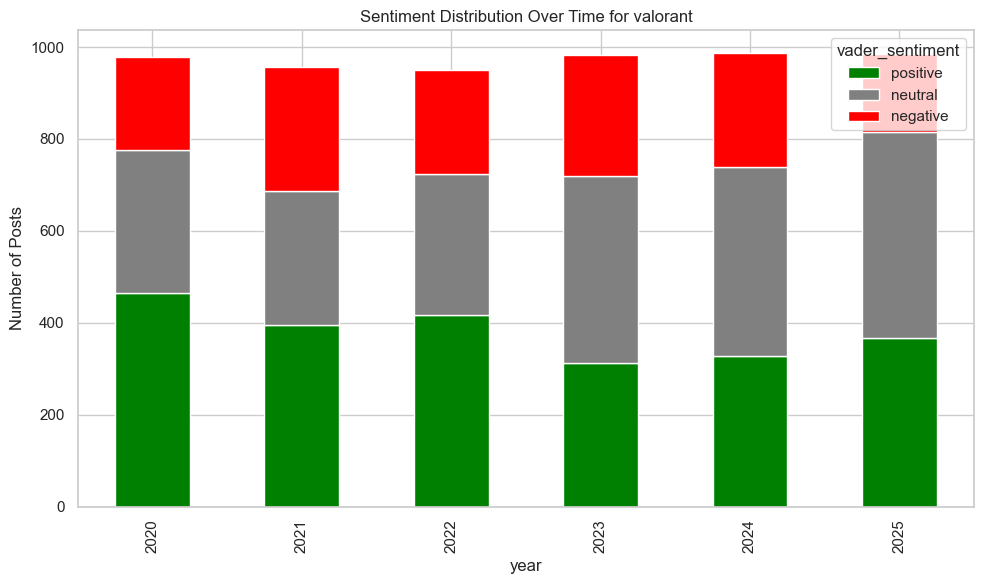

In [14]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Pivot for stacked bar plot
pivot_df = sentiment_counts.pivot_table(index=['subreddit', 'year'], 
                                        columns='vader_sentiment', 
                                        values='count', 
                                        fill_value=0).reset_index()

# Plot for each game
games = pivot_df['subreddit'].unique()
for game in games:
    game_df = pivot_df[pivot_df['subreddit'] == game]
    colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
    ax = game_df.set_index('year')[['positive', 'neutral', 'negative']].plot(
        kind='bar',
        stacked=True,
        color=[colors['positive'], colors['neutral'], colors['negative']],
        figsize=(10, 6),
        title=f"Sentiment Distribution Over Time for {game}",
        ylabel="Number of Posts"
    )
    plt.tight_layout()
    plt.show()

In [13]:
for game in sentiment_counts['subreddit'].unique():
    print(f"\n Sentiment Counts for {game}")
    game_df = sentiment_counts[sentiment_counts['subreddit'] == game]
    for year in sorted(game_df['year'].unique()):
        year_df = game_df[game_df['year'] == year]
        print(f"  Year {year}:")
        for sentiment in ['positive', 'neutral', 'negative']:
            count = year_df[year_df['vader_sentiment'] == sentiment]['count'].sum()
            print(f"    {sentiment.capitalize()}: {count}")


 Sentiment Counts for callofduty
  Year 2020:
    Positive: 359
    Neutral: 377
    Negative: 248
  Year 2021:
    Positive: 310
    Neutral: 412
    Negative: 253
  Year 2022:
    Positive: 350
    Neutral: 305
    Negative: 252
  Year 2023:
    Positive: 297
    Neutral: 437
    Negative: 254
  Year 2024:
    Positive: 262
    Neutral: 447
    Negative: 272
  Year 2025:
    Positive: 324
    Neutral: 442
    Negative: 225

 Sentiment Counts for gaming
  Year 2020:
    Positive: 362
    Neutral: 396
    Negative: 215
  Year 2021:
    Positive: 362
    Neutral: 347
    Negative: 251
  Year 2022:
    Positive: 433
    Neutral: 313
    Negative: 216
  Year 2023:
    Positive: 392
    Neutral: 378
    Negative: 211
  Year 2024:
    Positive: 390
    Neutral: 359
    Negative: 182
  Year 2025:
    Positive: 332
    Neutral: 400
    Negative: 251

 Sentiment Counts for genshinimpact
  Year 2020:
    Positive: 420
    Neutral: 409
    Negative: 127
  Year 2021:
    Positive: 304
    Neutra